In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 %pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
import folium
import requests
import io

In [7]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)
data = io.StringIO(response.text)
df=pd.read_csv(data)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [8]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [127]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [9]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [10]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [11]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [12]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [14]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,1,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,2,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,3,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,4,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,5,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [15]:
df.dtypes

Date                        object
Year                         int32
Month                        int32
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

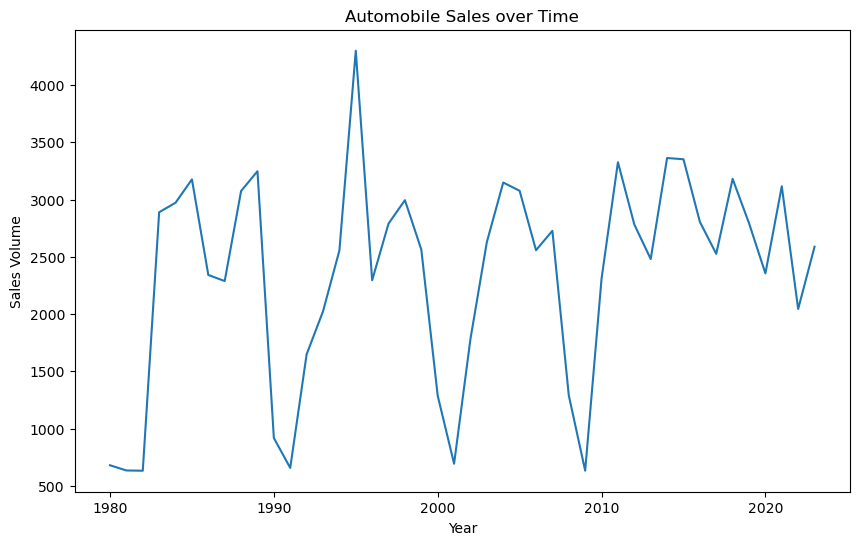

In [16]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

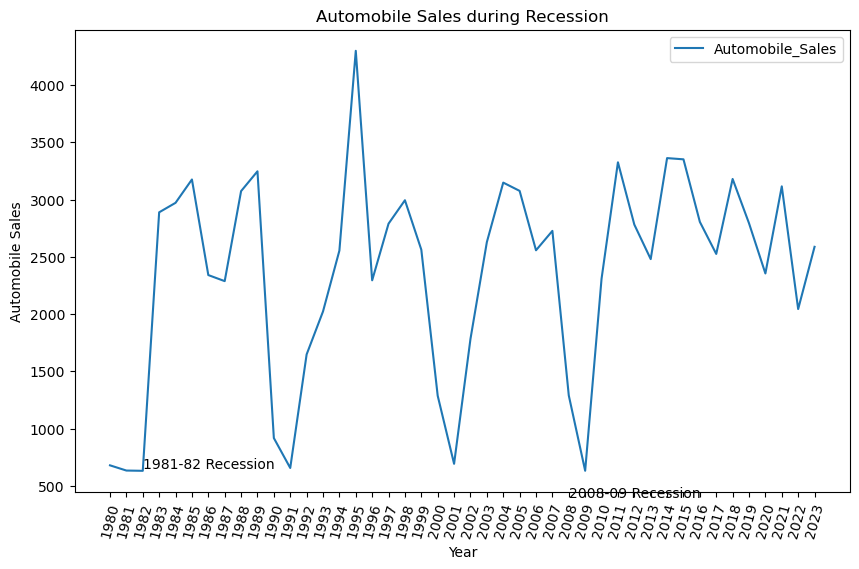

In [17]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 400, '2008-09 Recession')
plt.legend()
plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Line_Plot_1.png")
plt.show()

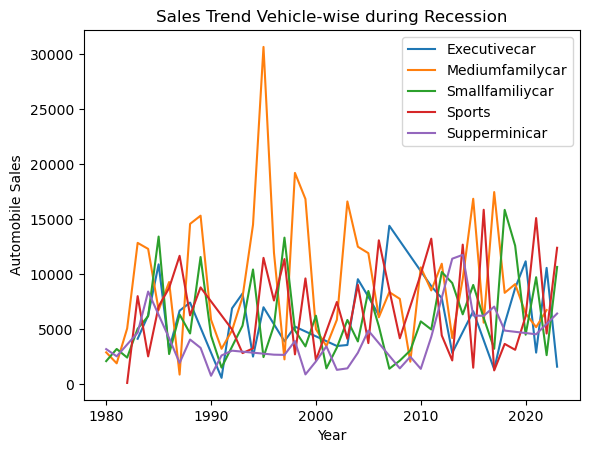

In [18]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Line_Plot_2.png")
plt.show()

In [19]:
print("""Inference: From this plot, we can understand that during recession period, 
            The sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
            While sales of the superminicar and smallfamilycar increased.""")

Inference: From this plot, we can understand that during recession period, 
            The sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
            While sales of the superminicar and smallfamilycar increased.


In [20]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
new_df

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


In [21]:
new_df.dtypes

Recession             int64
Automobile_Sales    float64
dtype: object

In [22]:
new_df['Recession'] = new_df['Recession'].astype(str)
new_df.dtypes

Recession            object
Automobile_Sales    float64
dtype: object

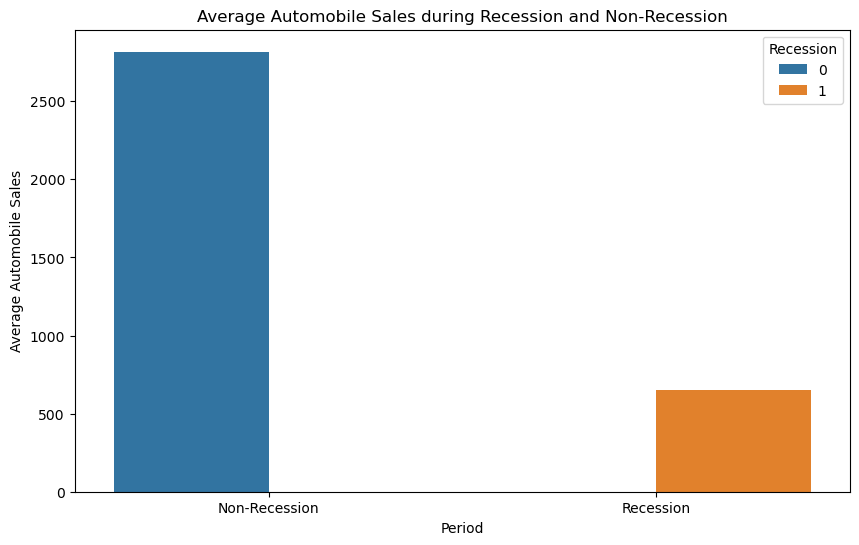

In [23]:
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

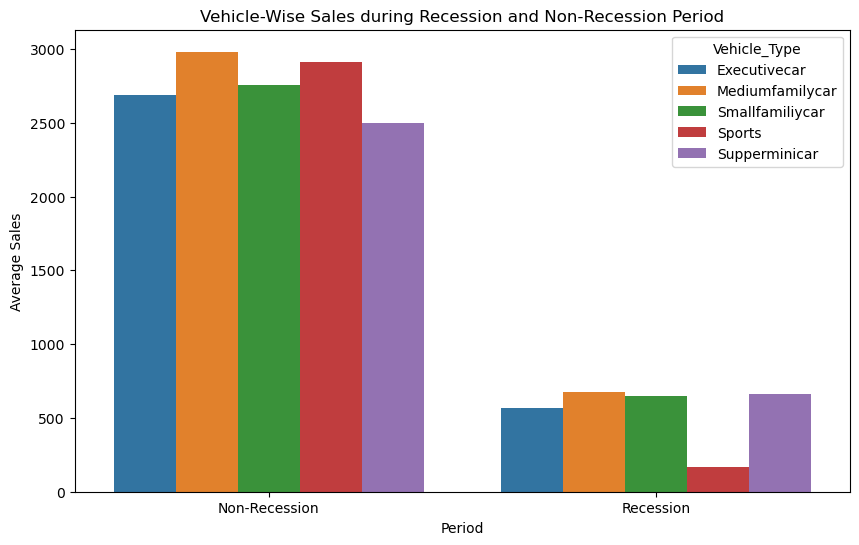

In [32]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

 # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Bar_Chart.png")
plt.show()

In [24]:
print( """From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports.""")

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports.


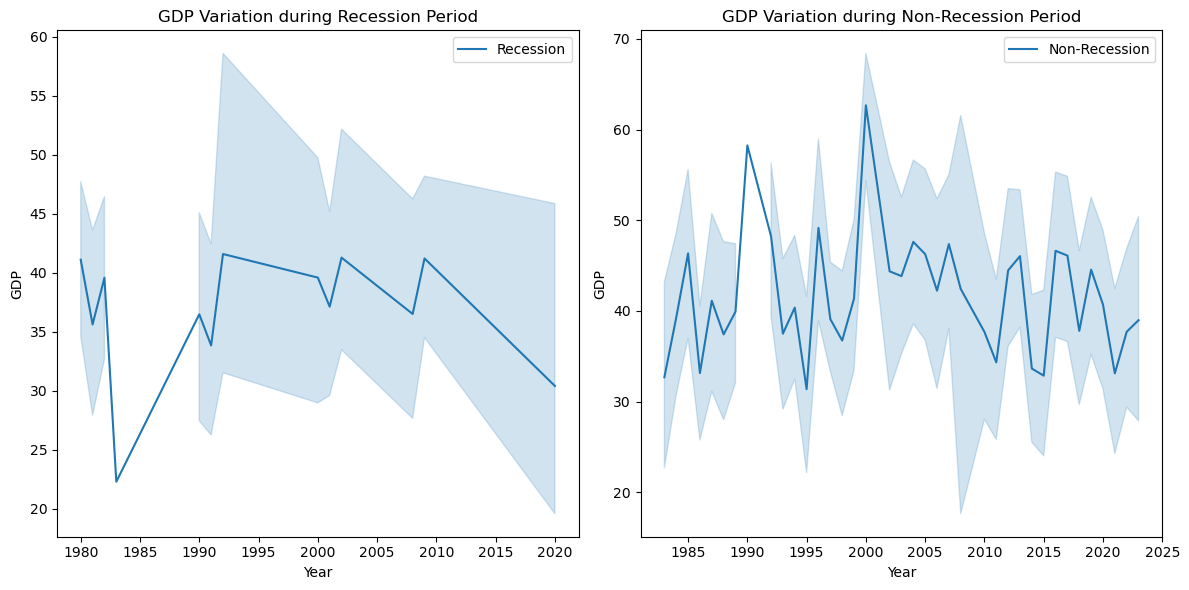

In [25]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2 ) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Subplot.png")
plt.show()

In [26]:
print("""From this plot, 
    it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company""")

From this plot, 
    it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company


In [27]:
non_rec_data = df[df['Recession'] == 0]
non_rec_data.shape

(415, 15)

In [28]:
marker_size=non_rec_data['Seasonality_Weight']  #for bubble effect
marker_size.shape

(415,)

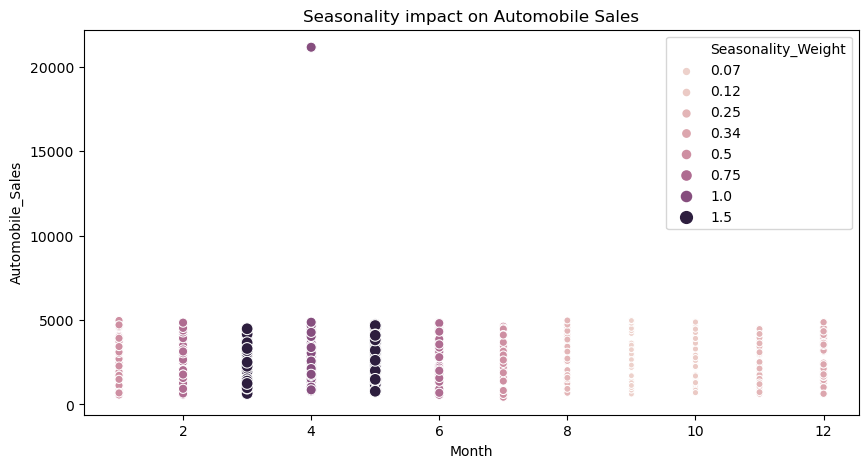

In [29]:
fig=plt.figure(figsize=(10, 5))
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
#size = size.astype(np.float)

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, color = 'black', hue='Seasonality_Weight', legend="full")
#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Bubble.png")
plt.show()

In [30]:
print("""From this plot, it is evident that seasonality has not affected on the overall sales. 
However, there is a drastic raise in sales in the month of April""")

From this plot, it is evident that seasonality has not affected on the overall sales. 
However, there is a drastic raise in sales in the month of April


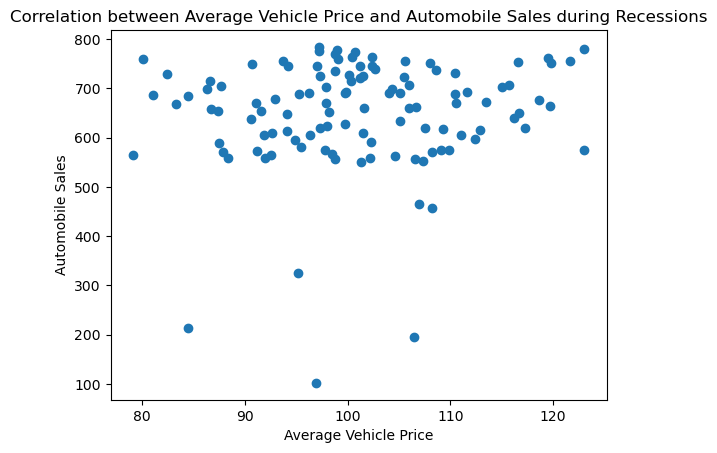

In [33]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Correlation between Average Vehicle Price and Automobile Sales during Recessions')
plt.show()

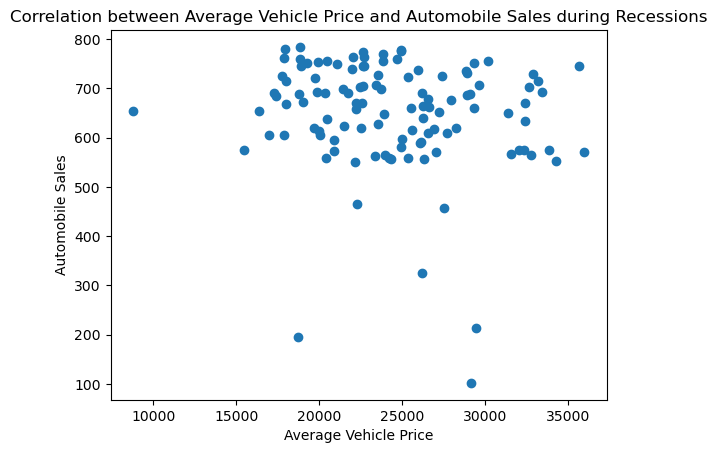

In [34]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Correlation between Average Vehicle Price and Automobile Sales during Recessions')

plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Scatter.png")
plt.show()

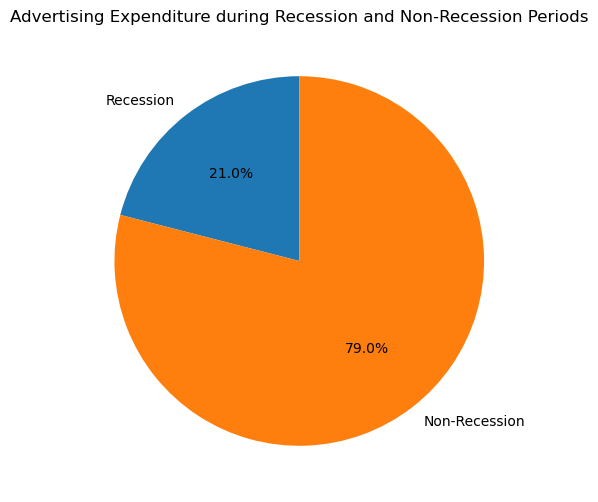

In [35]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Pie_1.png")
plt.show()

In [19]:
print("ABC Autos spent much more on ad during non-recession periods compared to recession time" )

ABC Autos spent much more on ad during non-recession periods compared to recession time


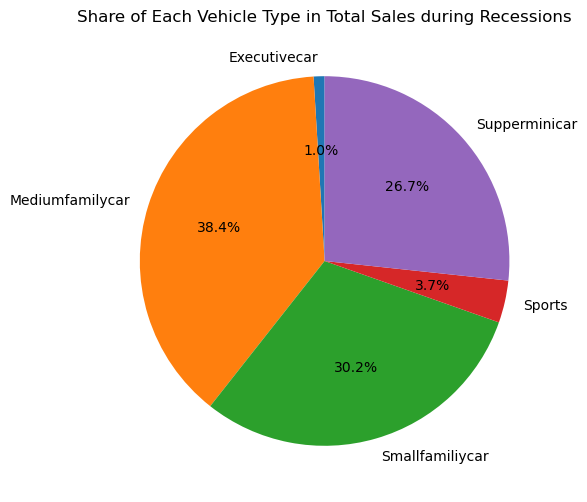

In [36]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\Pie_2.png")
plt.show()

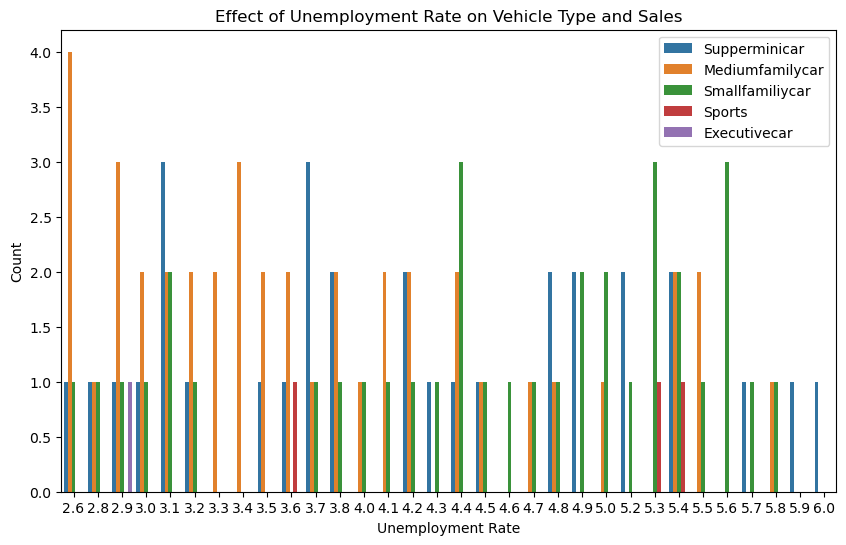

In [37]:
data= df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')

plt. savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\count_plot.png")
plt.show()


In [31]:
print( """During recession, buying pattern changed, the sales of low range vehicle 
    like superminicar,smallfamilycar and Mediumminicar""")

During recession, buying pattern changed, the sales of low range vehicle 
    like superminicar,smallfamilycar and Mediumminicar


In [50]:
df['unemployment_rate'].max())

6.0

In [51]:
df['unemployment_rate'].min()

1.0

In [107]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [68]:
df.unemployment_rate = df.unemployment_rate.astype('float') 

In [38]:
plt.figure(figsize=(10, 6))

df_rec = df[df['Recession']==1]
df_rec =  df_rec[["Vehicle_Type","unemployment_rate", "Automobile_Sales"]]
df_rec

,Vehicle_Type,unemployment_rate,Automobile_Sales
0,Supperminicar,5.4,456.0
1,Supperminicar,4.8,555.9
2,Mediumfamilycar,3.4,620.0
3,Supperminicar,4.2,702.8
4,Smallfamiliycar,5.3,770.4
...,...,...,...
108,Smallfamiliycar,5.0,594.5
109,Mediumfamilycar,3.7,692.8
110,Sports,3.6,214.0
111,Mediumfamilycar,4.2,597.1


<Figure size 1000x600 with 0 Axes>

In [101]:
df_rec.dtypes

Vehicle_Type          object
unemployment_rate    float64
Automobile_Sales     float64
dtype: object

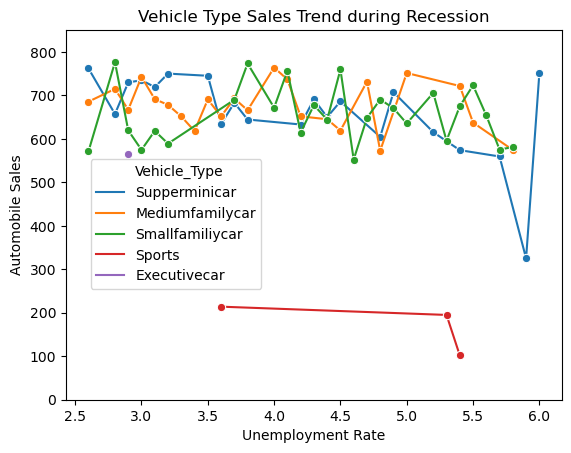

In [39]:
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Vehicle Type Sales Trend during Recession')

plt.savefig(r"C:\Users\rajes\OneDrive\Desktop\Course8 Project\line_plot_3.png")
plt.show()

In [113]:
print( """During recession, buying pattern changed, the sales of low range vehicle 
    like superminicar,smallfamilycar and Mediumminicar""")

During recession, buying pattern changed, the sales of low range vehicle 
    like superminicar,smallfamilycar and Mediumminicar


In [40]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
response = requests.get(URL)
data = io.StringIO(response.text)
Geocities=pd.read_json(data)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [138]:
Geocities

,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': 'AL', 'properties': ..."
1,FeatureCollection,"{'type': 'Feature', 'id': 'AK', 'properties': ..."
2,FeatureCollection,"{'type': 'Feature', 'id': 'AZ', 'properties': ..."
3,FeatureCollection,"{'type': 'Feature', 'id': 'AR', 'properties': ..."
4,FeatureCollection,"{'type': 'Feature', 'id': 'CA', 'properties': ..."
5,FeatureCollection,"{'type': 'Feature', 'id': 'CO', 'properties': ..."
6,FeatureCollection,"{'type': 'Feature', 'id': 'CT', 'properties': ..."
7,FeatureCollection,"{'type': 'Feature', 'id': 'DE', 'properties': ..."
8,FeatureCollection,"{'type': 'Feature', 'id': 'FL', 'properties': ..."
9,FeatureCollection,"{'type': 'Feature', 'id': 'GA', 'properties': ..."


In [42]:
for row in Geocities["features"]:
    print(row["id"], row["properties"]["name"])

AL Alabama
AK Alaska
AZ Arizona
AR Arkansas
CA California
CO Colorado
CT Connecticut
DE Delaware
FL Florida
GA Georgia
HI Hawaii
ID Idaho
IL Illinois
IN Indiana
IA Iowa
KS Kansas
KY Kentucky
LA Louisiana
ME Maine
MD Maryland
MA Massachusetts
MI Michigan
MN Minnesota
MS Mississippi
MO Missouri
MT Montana
NE Nebraska
NV Nevada
NH New Hampshire
NJ New Jersey
NM New Mexico
NY New York
NC North Carolina
ND North Dakota
OH Ohio
OK Oklahoma
OR Oregon
PA Pennsylvania
RI Rhode Island
SC South Carolina
SD South Dakota
TN Tennessee
TX Texas
UT Utah
VT Vermont
VA Virginia
WA Washington
WV West Virginia
WI Wisconsin
WY Wyoming


In [139]:
Geocities.columns

Index(['type', 'features'], dtype='object')

In [43]:
df["City"].unique()

array(['Georgia', 'New York', 'Illinois', 'California'], dtype=object)

In [142]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1
